20210130l_m2km
creating gammas
 - 50 polychromatic turbulence layers from 0 to 50 km
 - time: 2.24
calculation initial parametrs


C:\Users\miron\coding\domecam\main.py:48: RuntimeWarning: invalid value encountered in divide
  all_Cn2_bounds, all_Cn2_mean = processCn2(cc[latency_i]/cjk, y, x, gammas, conjugated_distance=conjugated_distance, heights_of_layers=heights_of_layers)


 - threshold: 0.0007; 1 peaks found
 - time: 0.29
approxing
 - initial guess for the parameters:
 Vx, m/s  Vy, m/s          Cn2   z, m  var, m/s
     0.0      0.0 1.509498e-13 2000.0       2.0
residual for initial guess:0.0013909350568456888
 - found params:
 Vx, m/s  Vy, m/s          Cn2   z, m  var, m/s
    0.01     0.03 1.509498e-13 2020.0  0.237663
 - total Cn2: 1.50949835772631e-13
 - seeing, 650 nm: 0.38
(2, 452, 452)
total residual:6.856290403118051e-05
 - time: 3.28


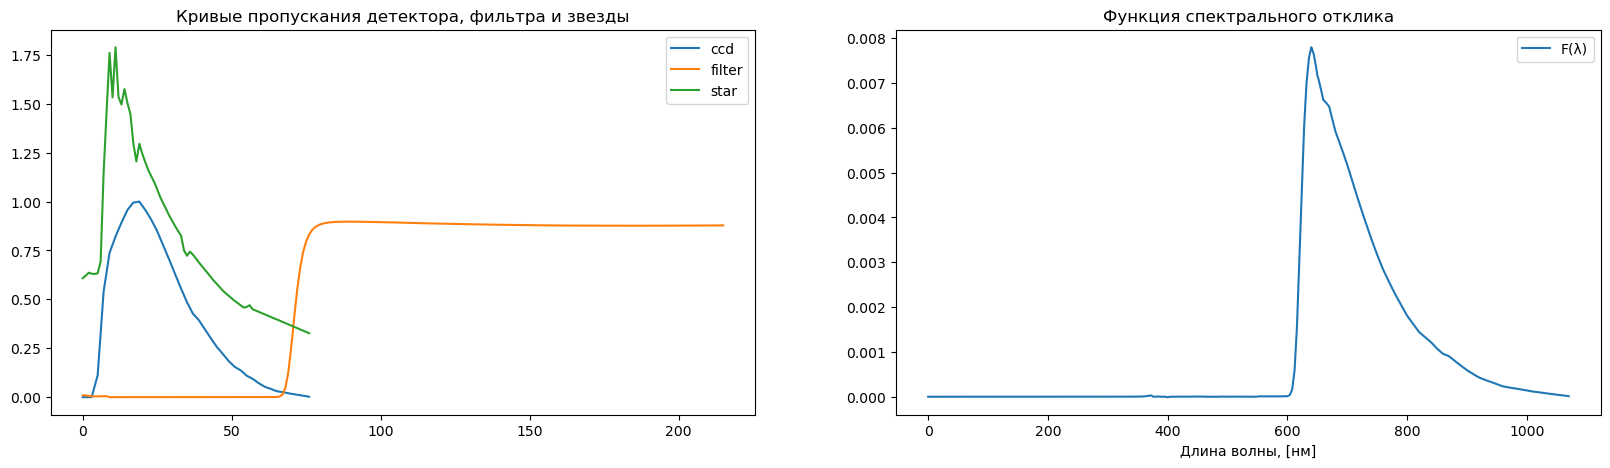

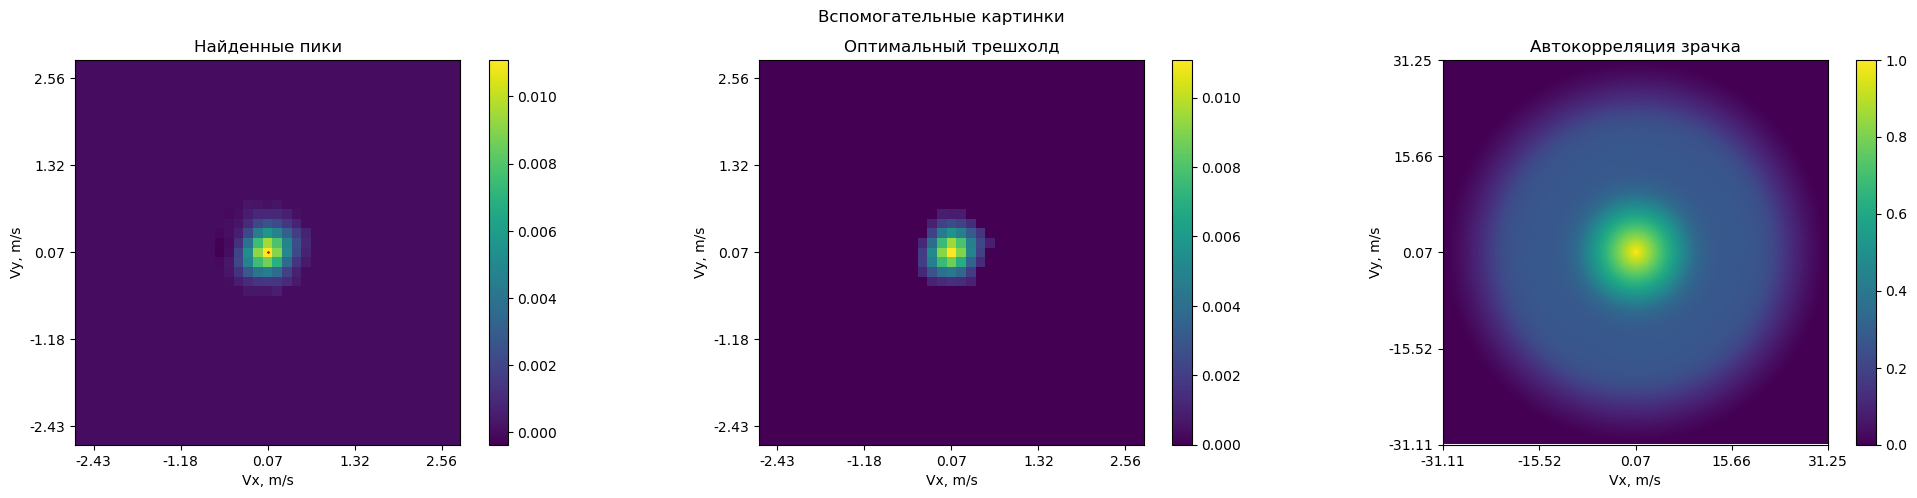

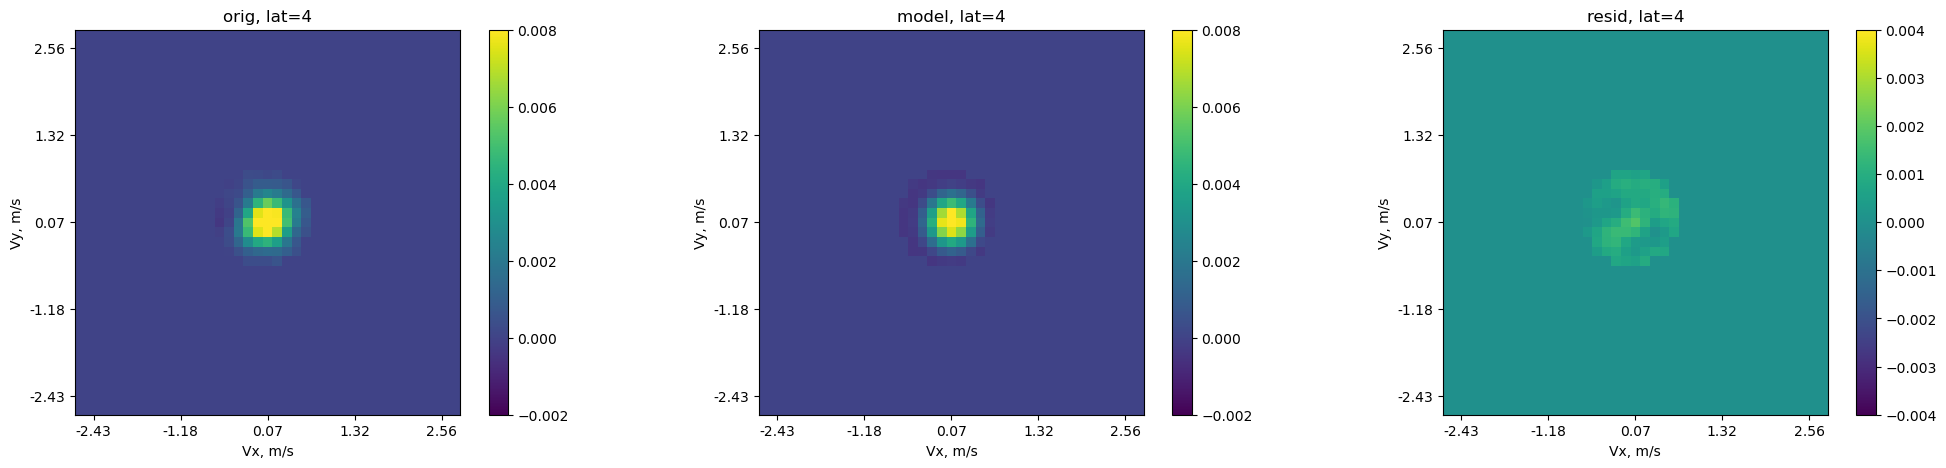

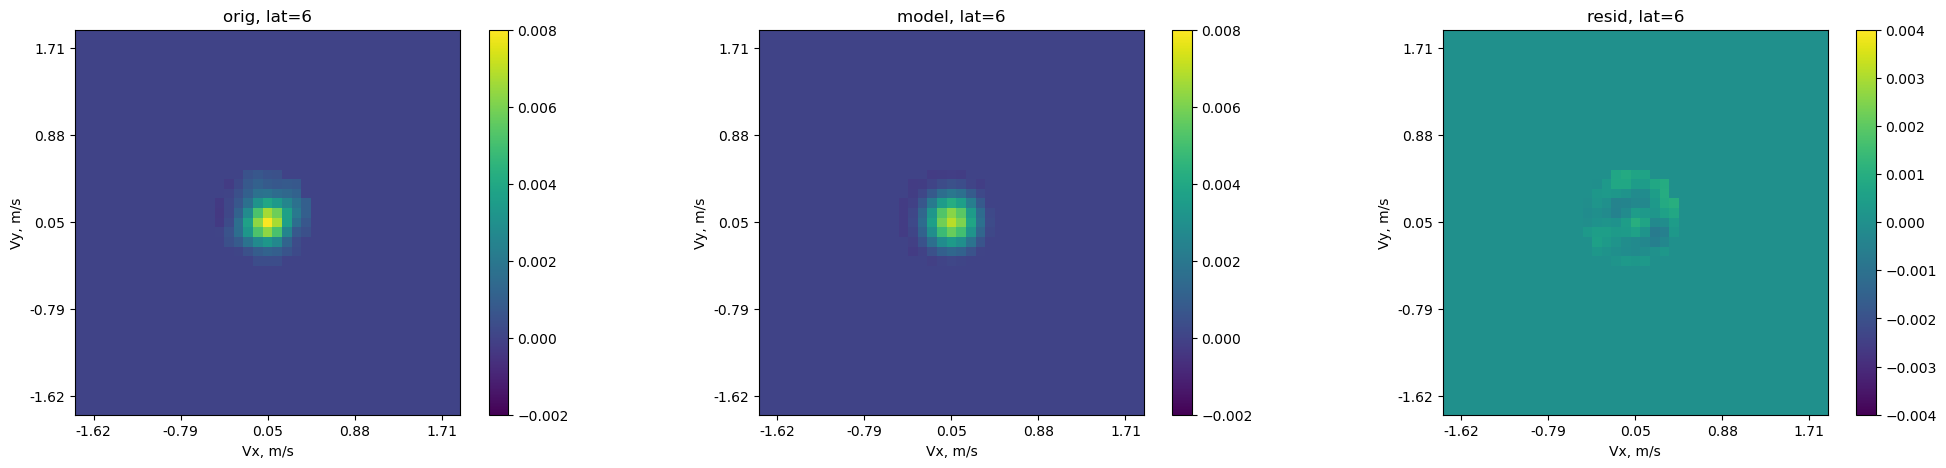

In [4]:
from main import processDomecam
import os
import getopt

# =====================================================================================================







# =====================================================================================================
file = '20210130l_m2km.fits'
file_bias = 'bias20210130.fits'
data_dir = 'D:/astro/domecam' # рабочая папка, все исходные файлы должны храниться в ней

latency = [4, 6] # задержка для кросс-корреляции, [кадр]
conjugated_distance = 2 # сопряженное расстояние, [километр]
D = 2.5 # диаметр телескопа, [метр]
spectrum = 'poly' # тип излучения
lambda_ = 650*1e-9 # длина наблюдаемой волны света, [метр]
 
use_gradient = False # БС: использовать ли градиенты между слоями
use_windvar = True # использовать ли дисперсию ветра

# для полихроматического излучения нужны кривые фильтра, детектора и звезды
file_filter = 'KC19_d16t4_Safonov.xls'
file_ccd = 'ccd_prosilica2.crv'
file_star = 'a05.sp'

# БС: если параметр do_fitting равен False: отладочный режим, аппроксимация не будет выполнена, а будут взяты начальные 
# параметры initial_params
# БС: если параметр do_fitting равен True, то будет выполнена оценка начальных параметров и проведена аппроксимация
do_fitting = True
dome_only = 5 # 0, чтобы отключить. >0, чтобы задать радиус области вокруг центра

# начальные параметры для аппроксимации в явном виде
# если их не указать, то они будут подобраны автоматически
# initial_params = [[   -0.03 ,    0.02, 2*0.5495173, 1.96746],
#                   [   -4.69 ,   -2.26, 5*1.019672,  3.23578],
#                   [   -6.38 ,   -6.27, 5*1.314183,  3.19194],
#                   [  -11.04 ,  -10.69, 2*1.060673,  9.83704],
#                   [  -17.26 ,  -16.99, 3*3.670290, 10.65737]]
#initial_params = None

for file in os.listdir(f'{data_dir}'):
    if file.endswith('.fits') and not file.startswith('bias'):
        print(file[:-5])
        processDomecam(file=file, file_bias=file_bias, data_dir=data_dir, 
               D=D, conjugated_distance=conjugated_distance, latency=latency,
               spectrum=spectrum, lambda_=lambda_, file_filter=file_filter, file_ccd=file_ccd, file_star=file_star,
               do_fitting=do_fitting, use_gradient=use_gradient, initial_params=None, dome_only=dome_only, 
               use_windvar=use_windvar)